# Assignment 1

**Due date:** Wednesday 13th September, 23:59

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

**Note:** Some experiments are quite computationally intensive, so they may take a while.

<div class="alert alert-warning">
<strong>Instructions for Cell Execution:</strong>

1. Execute the cell under "Used Libraries as first".
2. Run the cells in the order they appear.
3. At the end of exercises there is an extra part that explains some of my choices(**You can skip it!!**)
</div>

---
### Used Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

-----------------------
---
## Exercise 1

**(10 p total)**

### Tasks

<div class=" alert alert-info">

#### 1. Implement a GGL random number generator and run it to test that it works as it should. 
    
#### 2. Implement a RAN3 generator so that the initial set of elements (seeds) are generated by the GGL algorithm you wrote. 
    
#### 3. Simulate $X \sim U(0,1)$ and $Y \sim U(0,1)$ using your GGL, your RAN3 and the built-in random number generator in Python (Mersenne-Twister).


#### 4. For each RNG, place the consecutive random numbers as points in $(x, y)$-coordinates. (More precisely, take consecutively generated random numbers in the order x, y, x, y, x, y, … ) Inspect a sufficiently small interval (slice) $x \in [x_A, x_B]$ where $0< x_B-x_A<10^{-3}$ and y \in (0, 1] to see if there are any differences. (Note: you must generate a lot of points, well over 20000 - even up to 10% - random number pairs for the visual tests in order to see differences.) Name what you find.
Things to be shown for peergrading.

Notebook showing clearly the implementations of the required algorithms, the required
plots, and explanations of the findings -at least for ggl - using correct terminology
</div>

### Overview

To assess the proper functioning of a custom-built random number generator within Jupyter Lab, it is crucial to evaluate the following key properties:

*Absence of Correlations*: Verify the presence of any correlations among the generated numbers. A reliable random number generator should produce numbers that are independent and uncorrelated with each other.

*Uniformity:* Ensure that the generated numbers exhibit uniformity across the intended range. This entails an even distribution of numbers without any bias or clustering within specific intervals of the range.

So any generator will be tested according to this proprieties. To assess all these proprieties and for sake of semplicity, I will take a consistent sample of generated numbers and examine if the distributions appear random.


---
### Task 1: GGL Random Number Generator Implementation and Testing

In this task, we will implement the GGL random number generator and test its functionality through simulation.

**GGL Random Number Generator Implementation**

The GGL generator is a critical component for subsequent tasks, including Task 3. In this task, we will:

1. Implement the GGL random number generator function, building upon the definitions and concepts provided during the lecture.

2. Ensure that the GGL generator produces a sequence of random numbers within the desired interval (0, 1) and meets the uniformity and absence of correlation requirements by using visualization(scatter plot). **Note:** a more precise analysis is done in the last task.

3. Provide an option for users to specify the seed for reproducibility or use a randomly generated seed.

<div class="alert alert-info">

<strong>Testing GGL Through Simulation</strong>

Once the GGL generator is implemented, we will test its functionality by simulating random samples and analyzing the results. Specifically, we will:

1. Generate a sufficiently large random sample (30000 in this case) using the GGL generator.

2. Visualize the distribution of these samples to check for uniformity and absence of correlations. More precisely we pick just a portion of the generated sequence, for sake of semplicity but, also, in order to have a more understandable plot.

Let's proceed with the implementation and testing of the GGL random number generator.

<div>


In [2]:
##Definition of GGL

#I've just applied the definition given in "Lecture 1"

def GGL(seed=None, steps=25000, normalized=False):
    """
    Generate a random sequence using the GGL.
    
    Args:
        seed (int, optional):        The initial seed for the random number generator. 
                                     Default a random seed will be generated.
        steps (int, optional):       The number of steps to generate in the sequence.
                                     Default is 25000.
        normalized (bool, optional): Whether to normalize the random numbers to (0, 1).
                                     Default is False.

    Returns:
        Tuple[int, list]: A tuple containing the seed and a list of random numbers.
    """
    if seed is None:
        seed = random.randint(1, 100000)
    
    if steps <= 0:
        raise ValueError("Steps must be a positive integer.")
    
    random_numbers = []
    x=seed
    
    #apply definition og GGL
    for _ in range(steps):
        x = (16807 * x) % (2**31 - 1)
        random_number = x / (2**31 - 1) if normalized else x #the result will be normalized, if "normalized=true"
        
        random_numbers.append(random_number if normalized else x)#if 
    
    return (seed, random_numbers)

### Testing

In [3]:
#Let us view our sequence

seed_GGL, random_sequence_GGL = GGL(steps=30000, normalized=True) #Note this sequence will be used for all the section
print(f"Initial seed: {seed_GGL}")

#I print just a portion
print("Generated numbers:")
for i in range(20):
    print(f"Iteration {i}: {random_sequence_GGL[i]}")

Initial seed: 31113
Generated numbers:
Iteration 0: 0.24350182676850904
Iteration 1: 0.5352024983312946
Iteration 2: 0.1483894540687974
Iteration 3: 0.9815545342776713
Iteration 4: 0.98705760482096
Iteration 5: 0.47716422587501084
Iteration 6: 0.6991442813068369
Iteration 7: 0.5179359240075275
Iteration 8: 0.9490747945146052
Iteration 9: 0.10007140696983384
Iteration 10: 0.9001369419973981
Iteration 11: 0.6015841502703653
Iteration 12: 0.8248135940287326
Iteration 13: 0.6420748409079736
Iteration 14: 0.35185114031278114
Iteration 15: 0.5621152369129077
Iteration 16: 0.47078679523933065
Iteration 17: 0.5136675874300616
Iteration 18: 0.2111419370449809
Iteration 19: 0.6625359149940945


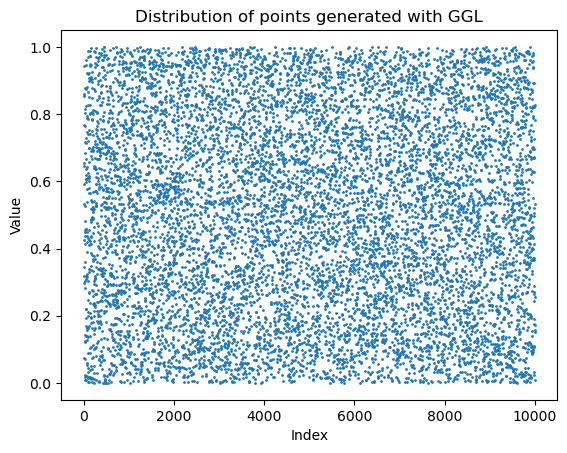

In [4]:
#Scatter_plot: to ensure lack of correlation and flatness

#As stated before I'll take just a sample in order to have 
#an understandable plot
sample_size=10000 #The choice of size aims to balance visibility with the need to capture 
                 #a substantial portion of the data
random_sample = np.random.choice(random_sequence_GGL, size=sample_size, replace=False)
plt.scatter(range(1, sample_size+1), random_sample,s=1)

#Customizing plot
plt.title("Distribution of points generated with GGL")
plt.xlabel("Index")
plt.ylabel("Value")

#show plot
plt.show()

The observed results appear random and do not exhibit any discernible pattern or trend. Based on this preliminary analysis, we can assert with a certain degree of confidence uniformity in their distribution. However, a more definitive assessment will be possible in the third task when we compare various methods and evaluate their skewness, which ideally should be close to zero for a uniform distribution.


Regarding the absence of correlations, it warrants further investigation. In fact, as we will discover in the final task, Generative Language Models (GGLs) may exhibit correlations, as indicated by our previous understanding from lectures.

---
### *Task 2*: RAN3: Testing and definition

In this task, we will build and test the RAN3 random number generator using seeds provided by the previously implemented GGL generator. Besides we test resulting sequence with a scatter plot like in the previuos case.

In [5]:
def RAN3(seeds=None, steps=25000, normalized=False):
    """
    Generate a random sequence using RAN3.
    
    Args:
        seeds (list, optional):       The initial seeds for the random number generator. 
                                     Default random seeds will be generated with previous GGL.
        steps (int, optional):       The number of steps to generate in the sequence.
                                     Default is 25000.
        normalized (bool, optional): Whether to normalize the random numbers to (0, 1).
                                     Default is False.

    Returns:
        Tuple[list, list]: A tuple containing the seeds and a list of random numbers.
    """
    
    if seeds is None:
        # We generate initial seeds with GGL (not normalized). 
        # Note that in this way you can also choose seeds
        (_, seeds) = GGL(steps=55) 

    state = seeds.copy()  # Make a copy
    random_numbers = []  # Initialize the list

    for _ in range(steps):  # Apply definition
        new_random = (state[-55] - state[-24]) % (2 ** 31 - 1)
        state.append(new_random)
        random_number = new_random / (2 ** 31 - 1) if normalized else new_random
        random_numbers.append(random_number)

    return seeds, random_numbers

### Testing

In [6]:
#Let us view our sequence

seed_RAN3, random_sequence_RAN3 = RAN3(steps=30000, normalized=True) 

#print some seeds
for i in range(5):
    print(f'Seed number {i}: {seed_RAN3[i]}')
    
#just a portion of the sequence
for i in range(10):
    print(f'Iteration {i}: {random_sequence_RAN3[i]}')

Seed number 0: 810416733
Seed number 1: 1332742257
Seed number 2: 1144675189
Seed number 3: 1397391697
Seed number 4: 1081087887
Iteration 0: 0.9501041057287268
Iteration 1: 0.3997049827127275
Iteration 2: 0.8416444528110533
Iteration 3: 0.5183183953716971
Iteration 4: 0.37727101211309017
Iteration 5: 0.793900584706059
Iteration 6: 0.08712715473357921
Iteration 7: 0.3460896072658196
Iteration 8: 0.7280293166302281
Iteration 9: 0.9887246042437501


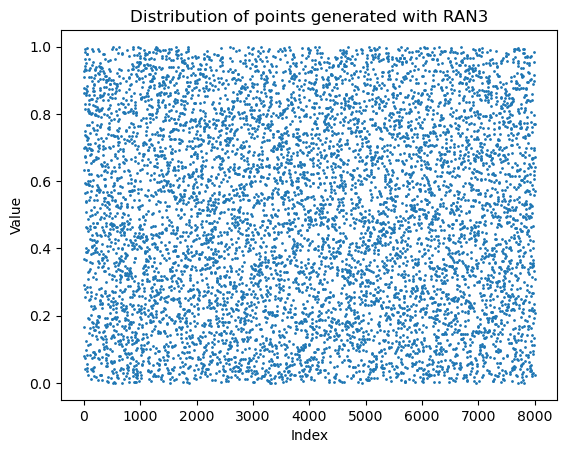

In [7]:
#The following part is a check to ensure that the sequence is uniform and uncorrelated.
#The method and the code is the same as in the previous case.

sample_size=8000
random_sample = np.random.choice(random_sequence_RAN3, size=sample_size, replace=False)
plt.scatter(range(1, sample_size+1), random_sample,s=1)

#Customizing plot
plt.title("Distribution of points generated with RAN3")
plt.xlabel("Index")
plt.ylabel("Value")

#show plot
plt.show()

Even now  we can assert with a certain degree of confidence the absence of correlation among the data and uniformity in their distribution. As said before, all will be more clear in the next tasks.

---
### Task 3: Simulation

In this task, we will simulate two uniform distributions using three different random number generation methods as required in the task instructions. We will then analyze these distributions through visualization.

**Method 1: GGL Random Number Generator**

We will use the GGL (Generators with a Geometrically Distributed List of Values) random number generator. This generator produces a sequence of random numbers and can be used to simulate a uniform distribution within the interval (0, 1).

**Method 2: RAN3 Random Number Generator**

Next, we will utilize the RAN3 random number generator. RAN3 is a subtractive method that does not suffer from certain correlations present in other generators. We will use it to generate another uniform distribution within the interval (0, 1).

**Method 3: Python's Built-in Mersenne-Twister Generator**

Finally, we will employ Python's built-in Mersenne-Twister random number generator. This widely-used generator will provide us with a third uniform distribution in the interval (0, 1).

<div class="alert alert-info">
<strong >Data Generation and Analysis</strong >

We will generate random samples from each of these methods and compare them. Specifically, we will:

1. Generate random samples from each method, ensuring a sufficiently large sample size (30000 in this case).

2. Evaluate sample mean and sample variance.
    
3. Visualize the generated uniform distributions to observe their characteristics. In fact, a uniform distribution exhibits a key characteristics: the histogram should remain relatively constant around the mean value

Let's proceed with the simulations and analysis.


---
**<font color='red'> Uniformity and skewness analysis </font>**

In this section, we will perform a more detailed evaluation of the uniformity of the generated sequences. It's important to note that if $Z \sim U(a, b)$, where $a < b \in \mathbb{R}$, we can calculate the following properties:

$\mathbb{E}(Z) = \frac{1}{2}(b - a)$ (expected value)
    
$\mathbb{Var}(Z) = \frac{1}{12}(b - a)$ (variance)
    
$\textit{skew}(Z) = 0$ (skewness)
 
We will utilize these properties to conduct a simple yet precise assessment of uniformity and to compare the three random number generators.
    
</div>

In [8]:
#Skewness evaluation

def skewness(sequence):
    """
    Calculate the skewness of a dataset.

    Args:
        data (array-like): The dataset for which skewness is to be calculated.

    Returns:
        float: The skewness of the dataset.
    """
    n = len(sequence)
    mean = np.mean(sequence)
    
    # Calculate the standard deviation with ddof=0 to use the population formula
    std_dev = np.std(sequence, ddof=0)
    
    # Calculate skewness using the formula
    skew = np.sum((sequence - mean) ** 3) / (n * std_dev ** 3)
    
    return skew

In [9]:
# Number of random samples to generate
num_samples = 30000

# Using GGL, we build two uniform distribution X,Y
X_seed_GGL, X_random_sequence_GGL = GGL(steps=num_samples, normalized=True)
Y_seed_GGL, Y_random_sequence_GGL = GGL(steps=num_samples, normalized=True)

# Using RAN3, we build two uniform distribution X,Y
X_seeds_RAN3, X_random_sequence_RAN3 = RAN3(steps=num_samples, normalized=True)
Y_seeds_RAN3, Y_random_sequence_RAN3 = RAN3(steps=num_samples, normalized=True)

# Using Python's built-in Mersenne-Twister generator, again we build X,Y
X_random_sequence_MT = [random.random() for _ in range(num_samples)]
Y_random_sequence_MT = [random.random() for _ in range(num_samples)]

In [10]:
# Now we compute sample mean and sample variance for all sequences and skewness

#GGL
mean_X_GGL = np.mean(X_random_sequence_GGL)
variance_X_GGL = np.var(X_random_sequence_GGL)
skew_X_GGL = skewness(X_random_sequence_GGL)

mean_Y_GGL = np.mean(Y_random_sequence_GGL)
variance_Y_GGL = np.var(Y_random_sequence_GGL)
skew_Y_GGL = skewness(Y_random_sequence_GGL)

#RAN3
mean_X_RAN3 = np.mean(X_random_sequence_RAN3)
variance_X_RAN3 = np.var(X_random_sequence_RAN3)
skew_X_RAN3 = skewness(X_random_sequence_RAN3)

mean_Y_RAN3 = np.mean(Y_random_sequence_RAN3)
variance_Y_RAN3 = np.var(Y_random_sequence_RAN3)
skew_Y_RAN3 = skewness(Y_random_sequence_RAN3)

#MT
mean_X_MT = np.mean(X_random_sequence_MT)
variance_X_MT = np.var(X_random_sequence_MT)
skew_X_MT = skewness(X_random_sequence_MT)

mean_Y_MT = np.mean(Y_random_sequence_MT)
variance_Y_MT = np.var(Y_random_sequence_MT)
skew_Y_MT = skewness(Y_random_sequence_MT)

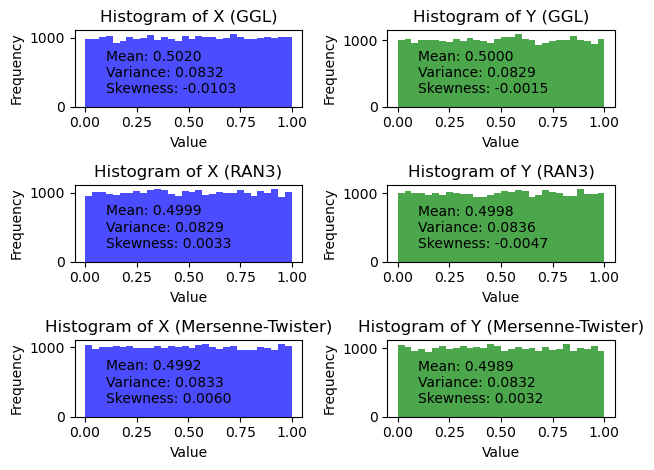

In [11]:
# Plot histograms for X and Y generated with GGL
plt.subplot(3, 2, 1)
plt.hist(X_random_sequence_GGL, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of X (GGL)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(0.1, 200, f'Mean: {mean_X_GGL:.4f}\nVariance: {variance_X_GGL:.4f}\nSkewness: {skew_X_GGL:.4f}', fontsize=10, color='black')

plt.subplot(3, 2, 2)
plt.hist(Y_random_sequence_GGL, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Y (GGL)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(0.1, 200, f'Mean: {mean_Y_GGL:.4f}\nVariance: {variance_Y_GGL:.4f}\nSkewness: {skew_Y_GGL:.4f}', fontsize=10, color='black')

# Plot histograms for X and Y generated with RAN3
plt.subplot(3, 2, 3)
plt.hist(X_random_sequence_RAN3, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of X (RAN3)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(0.1, 200, f'Mean: {mean_X_RAN3:.4f}\nVariance: {variance_X_RAN3:.4f}\nSkewness: {skew_X_RAN3:.4f}', fontsize=10, color='black')

plt.subplot(3, 2, 4)
plt.hist(Y_random_sequence_RAN3, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Y (RAN3)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(0.1, 200, f'Mean: {mean_Y_RAN3:.4f}\nVariance: {variance_Y_RAN3:.4f}\nSkewness: {skew_Y_RAN3:.4f}', fontsize=10, color='black')

# Plot histograms for X and Y generated with Mersenne-Twister
plt.subplot(3, 2, 5)
plt.hist(X_random_sequence_MT, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of X (Mersenne-Twister)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(0.1, 200, f'Mean: {mean_X_MT:.4f}\nVariance: {variance_X_MT:.4f}\nSkewness: {skew_X_MT:.4f}', fontsize=10, color='black')

plt.subplot(3, 2, 6)
plt.hist(Y_random_sequence_MT, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Y (Mersenne-Twister)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(0.1, 200, f'Mean: {mean_Y_MT:.4f}\nVariance: {variance_Y_MT:.4f}\nSkewness: {skew_Y_MT:.4f}', fontsize=10, color='black')

plt.tight_layout()
plt.show()

The histograms presented above do not display significant differences; each distribution maintains an almost constant pattern. Additionally, the variances across different samples exhibit minimal differences, which leads us to confidently assert that uniformity is indeed present, and all the employed methods are essentially equivalent.

Moreover, as stated earlier, the mean of a uniform distribution in the interval (0, 1) should be 0.5. As observed in the plot above, every sequence has a mean very close to the expected value.

Furthermore, the expected variance of such a distribution should be 1/12, which equals 0.0833. In this case, all sequences achieve a variance close to the expected value.

Nonetheless, the skewness shows that all RNG have the best behavior with values closer to 0.

BHowever, it's worth noting that each of these choices is valid since the differences between them are minimal.

---
### *Task 4*


To make the code more concise and understandable, I've created the following functions that automatically plot data.

In [12]:
#the first function just split the sequence and filters accordinig to a lower bound and upper bound

def task4_plots(sequence, lower_bounds, upper_bounds, RNG_type=None):
    """
    Plot points (x, y) from the given sequence within specified bounds.

    Args:
        sequence (list): The input sequence containing x and y values interleaved.
        lower_bounds (list): List of lower bounds for x values.
        upper_bounds (list): List of upper bounds for x values.
        RNG_type (str): Type of random number generator.

    Returns:
        None
    """
    
    if len(sequence) % 2 != 0 or len(lower_bounds) % 2 != 0 or len(upper_bounds) % 2 != 0:
        print('The number of intervals, lower bounds, and upper bounds should all be even.')
        return
    
    
    x = sequence[::2]  # Extract even-indexed elements (x values)
    y = sequence[1::2]  # Extract odd-indexed elements (y values)

    num_plots = len(lower_bounds)

    # Define the number of rows and columns for subplots
    rows = num_plots // 2  # Assuming 2 subplots per row
    cols = 2  # Two subplots per row

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.75)  # Adjust vertical spacing

    # Add the common title for RNG Type
    fig.suptitle(f'RNG Type: {RNG_type}, Sequence dimension={len(x)}', fontsize=16)

    for i in range(num_plots):
        lower_bound = lower_bounds[i]
        upper_bound = upper_bounds[i]

        filtered_x = [value for value in x if lower_bound <= value <= upper_bound]
        filtered_y = [y[j] for j in range(len(x)) if lower_bound <= x[j] <= upper_bound]

        # Determine the subplot position
        row = i // 2
        col = i % 2

        # Create a scatter plot for each set of filtered data
        axs[row, col].scatter(filtered_x, filtered_y, alpha=0.5, s=0.5)
        axs[row, col].set_xlabel('X')
        axs[row, col].set_ylabel('Y')
        axs[row, col].set_title(f'Scatter Plot\nBounds [{lower_bound}, {upper_bound}]')
        axs[row, col].grid(True)


    plt.show()

The 'task4_plots' function may appear somewhat lengthy and complex, but it offers the advantage of generating readable and automated plots while streamlining the code.

Now, let's proceed with the plot visualization. The concept is straightforward: for each Random Number Generator (RNG), we will generate sequences (normalized) with fixed dimensions. For each generated sequence, we will create plots within different intervals, those intervals are chosen randomly with a random small length.

Certainly, the position of the interval is not very relevant due to the uniformity of the distribution. Instead, my focus will be on reducing the width of the intervals. In fact, intervals will be randomly selected. By running the code several times and changing the number of intervals, you'll notice that there won't be significant differences. However, the dimension of the sample sequences will remain fixed, as it can significantly affect the plots.

In [13]:
#I'll pick random intervals of small length
# Define the number of intervals and interval width

num_intervals = 4  # Adjust as needed, rembere to choose multples of 4
interval_widths = np.logspace(-3.1, -4, num=num_intervals)

# Initialize lists to store lower bounds and upper bounds
lower_bounds = []
upper_bounds = []

# Generate lower and upper bounds based on the intervals
for interval_width in interval_widths:
    lower_bound = np.random.uniform(0, 1 - interval_width)  # Ensure interval fits within (0, 1)
    upper_bound = lower_bound + interval_width
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

# Print the generated lower and upper bounds
print("Lower Bounds:", lower_bounds)
print("Upper Bounds:", upper_bounds)

Lower Bounds: [0.35624437167066575, 0.2867633592577453, 0.37359240435463986, 0.19990273446967044]
Upper Bounds: [0.35703869990539006, 0.2871614664282988, 0.37379193058613674, 0.20000273446967043]


In [14]:
# Now I'll define the dimensions of the samples (these will be fixed) with logarithmic spacing.

num_dimensions = 4 #you can also increase dnumber of dimensions for input sequence but it might take a lot

# Generate even dimensions with logarithmic spacing.
dimensions = np.round(np.logspace(5.5, 7, num=num_dimensions, dtype=int) / 2) * 2
# Note that this control is unnecessary since I've already handled the odd case in the function 'task4_plot'.

# Print the generated dimensions.
print(dimensions)

[  316228.  1000000.  3162276. 10000000.]


---------GGL---------


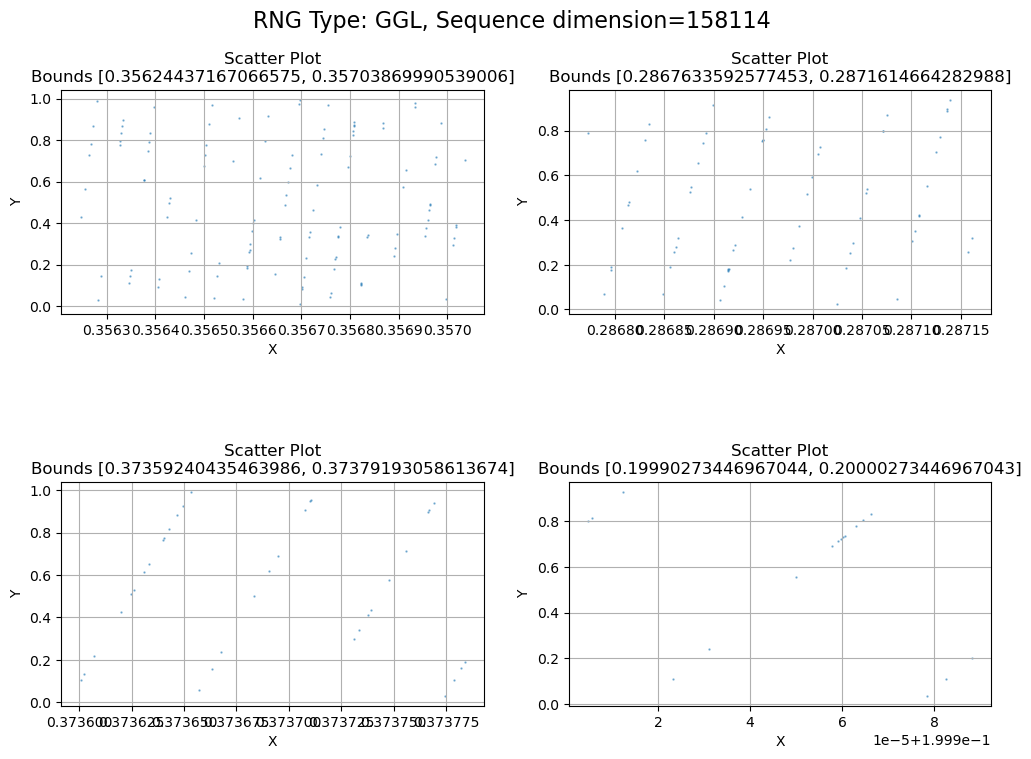

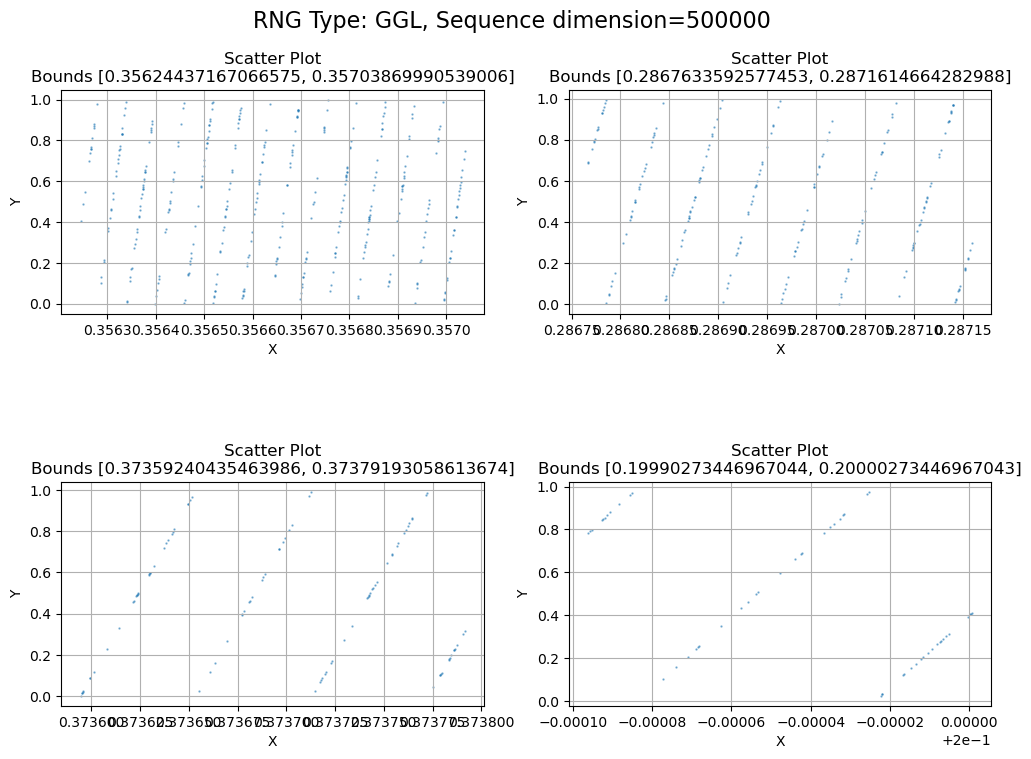

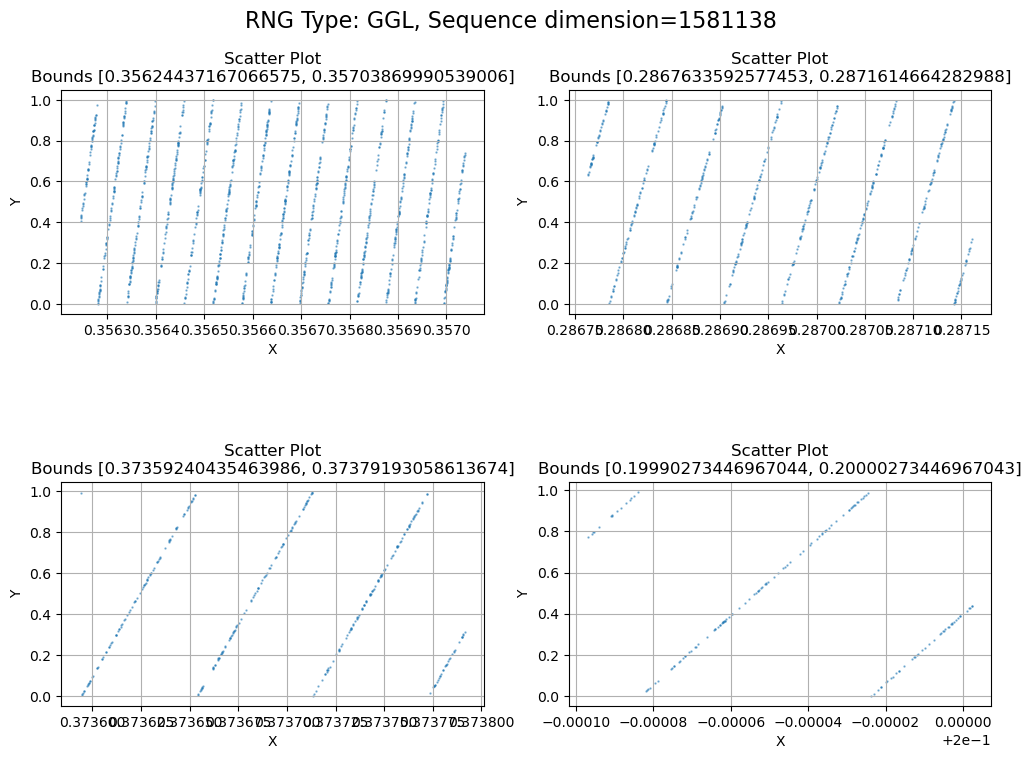

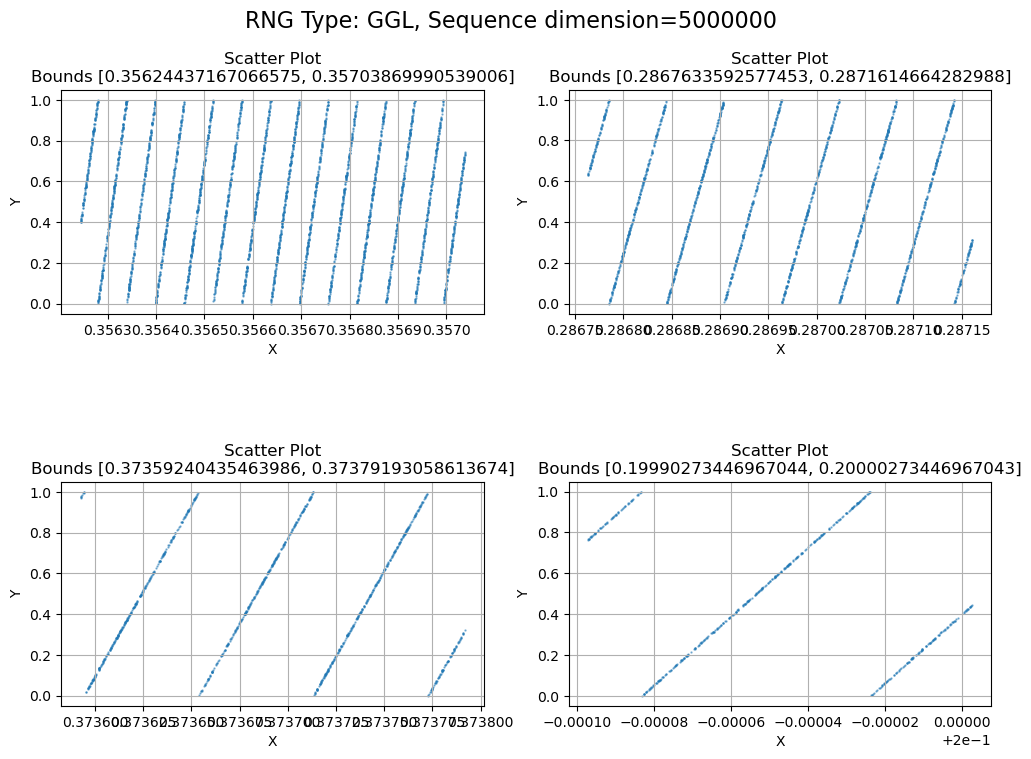

---------RAN3---------


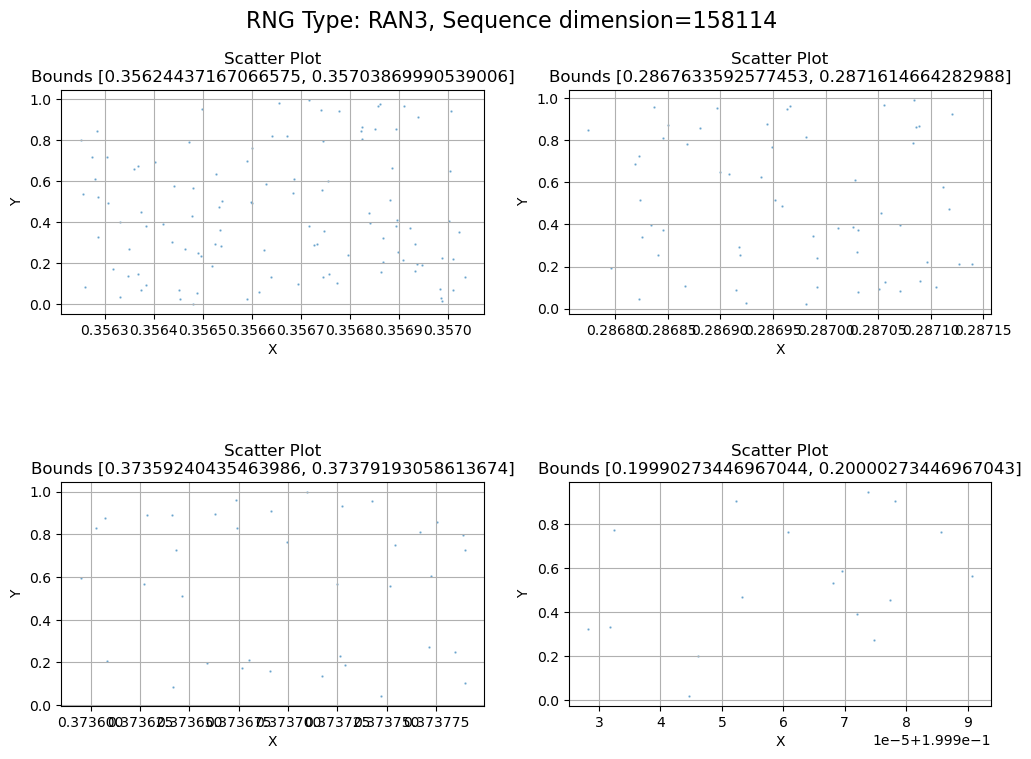

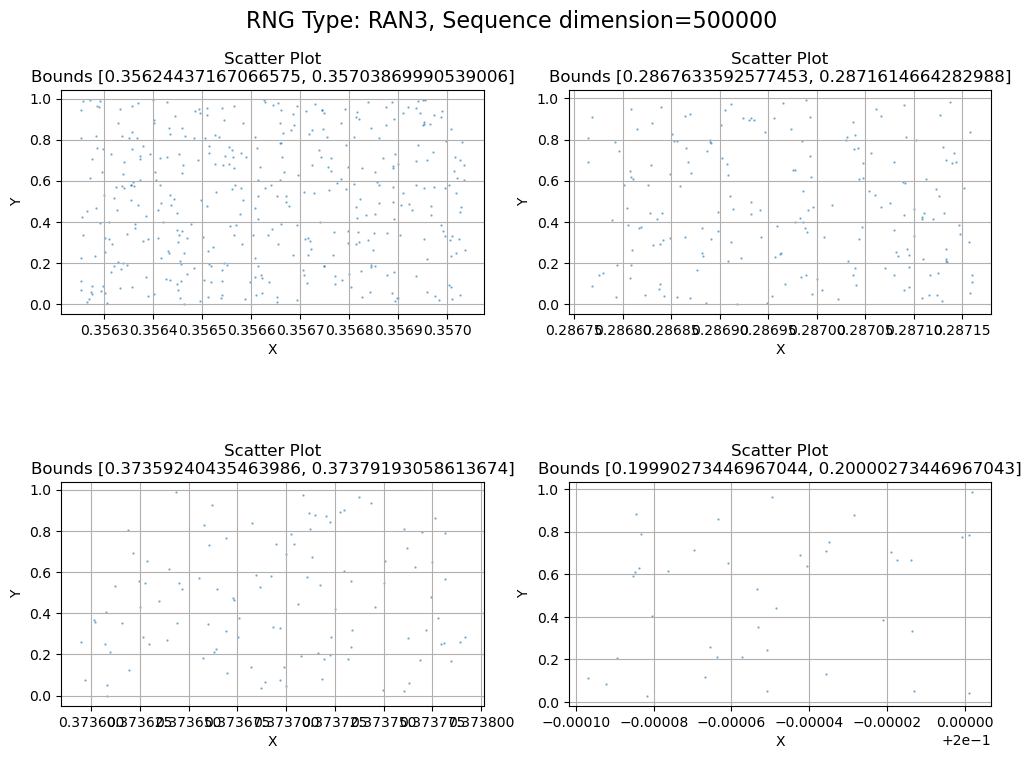

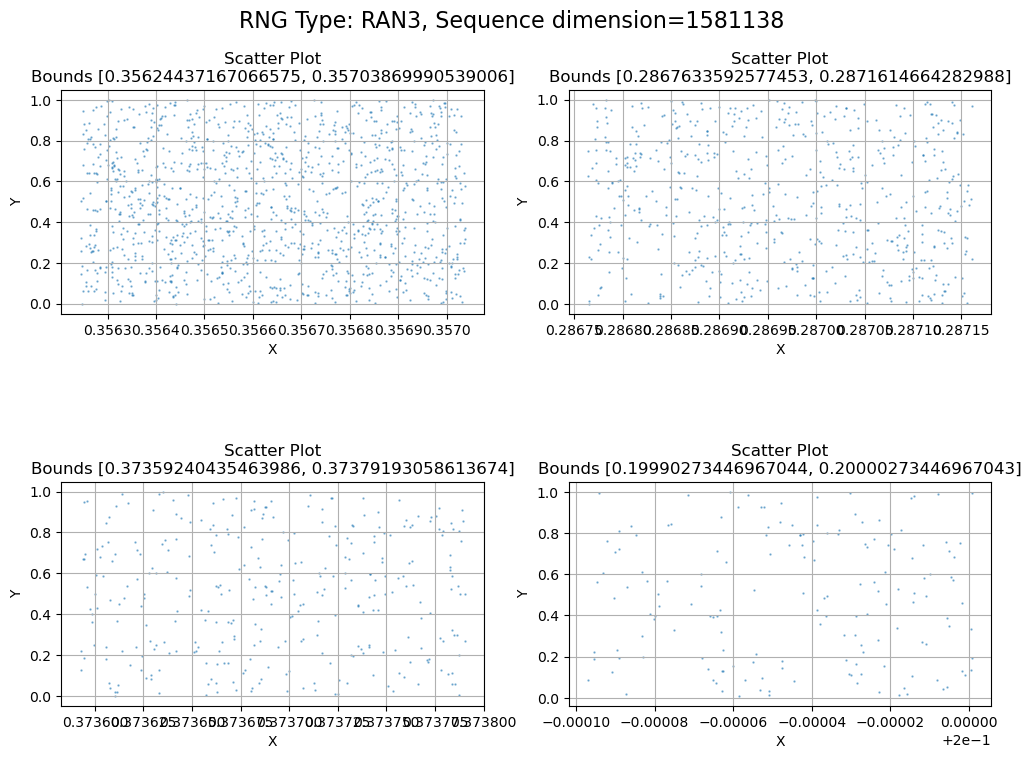

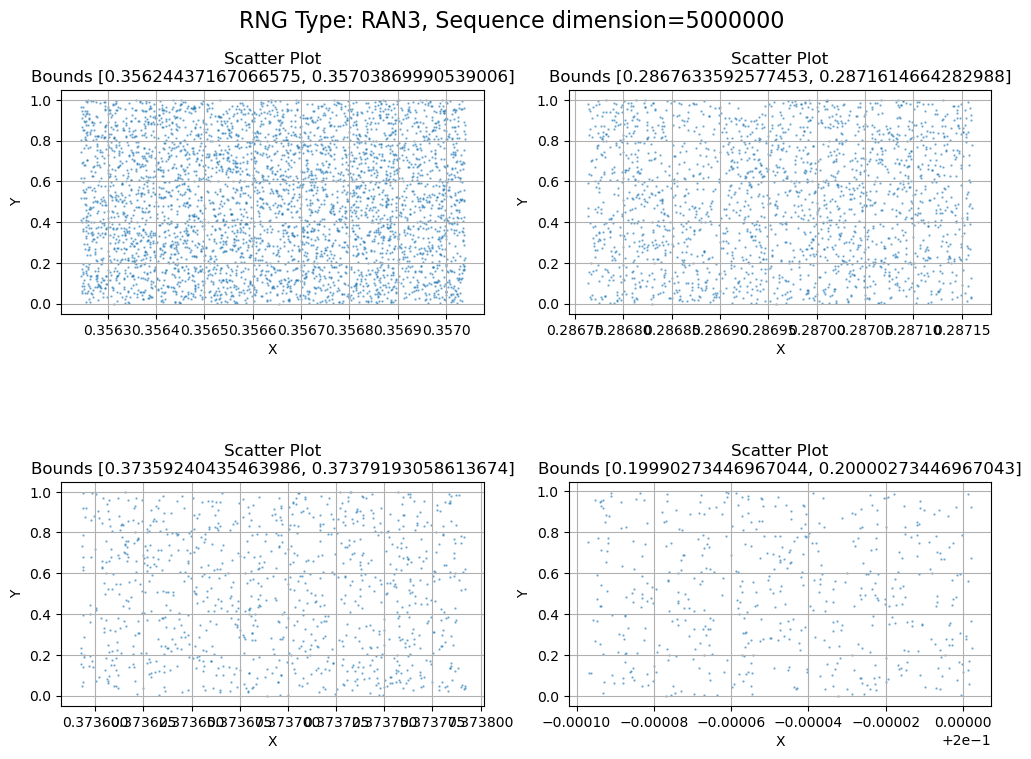

---------MT---------


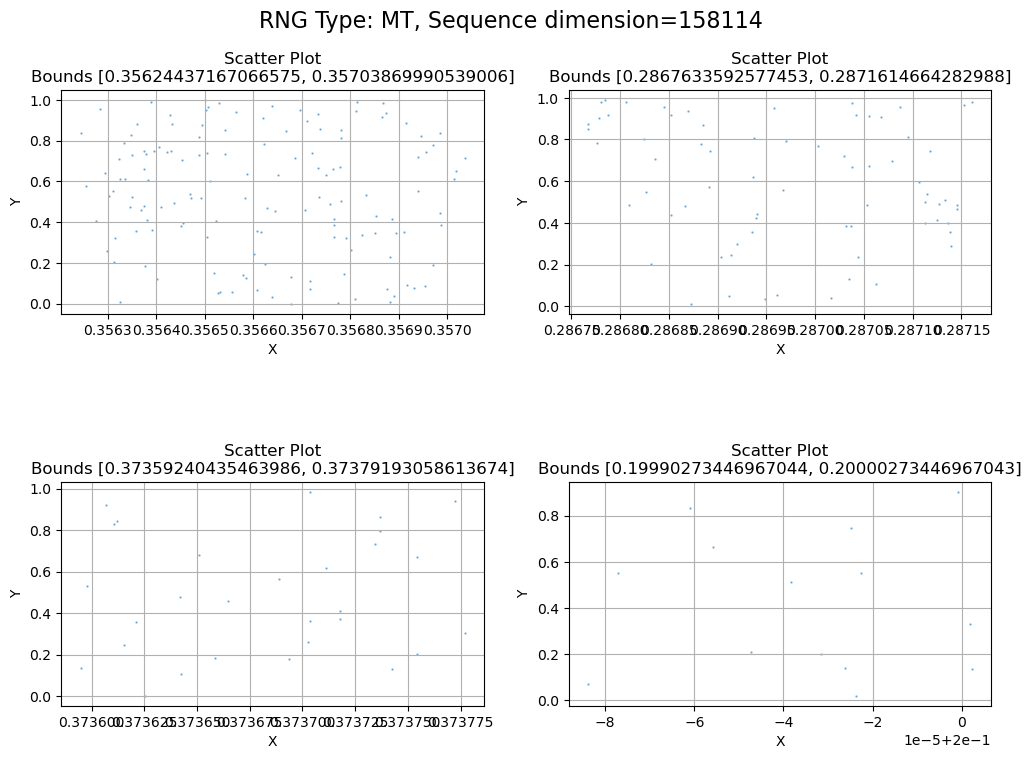

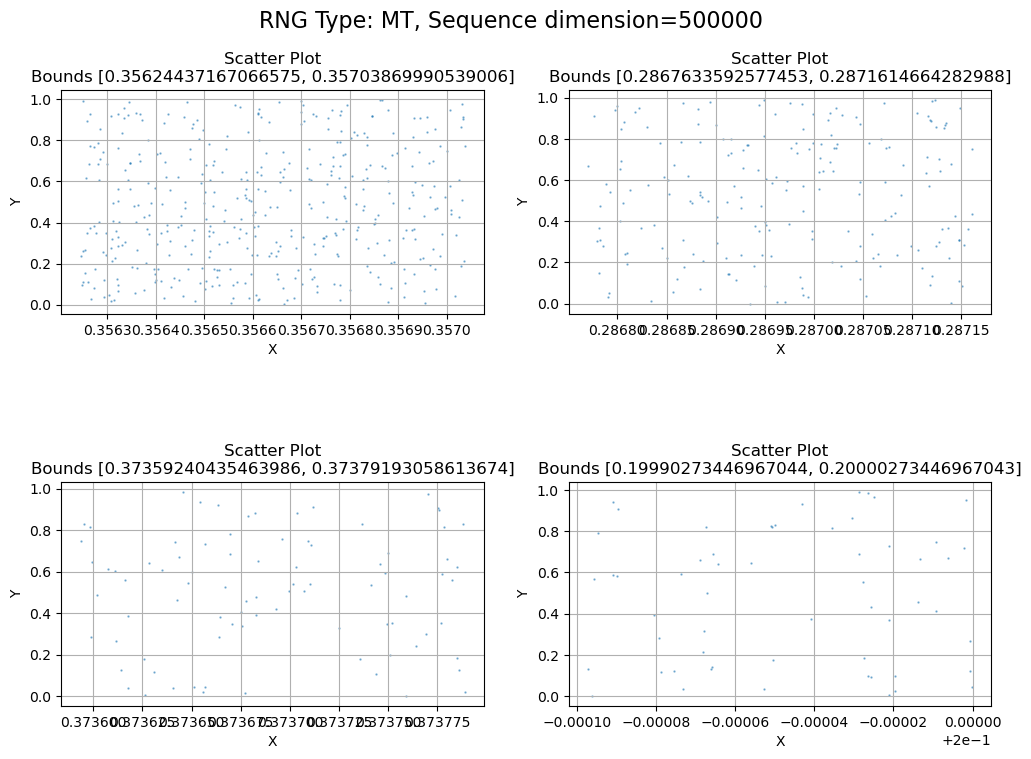

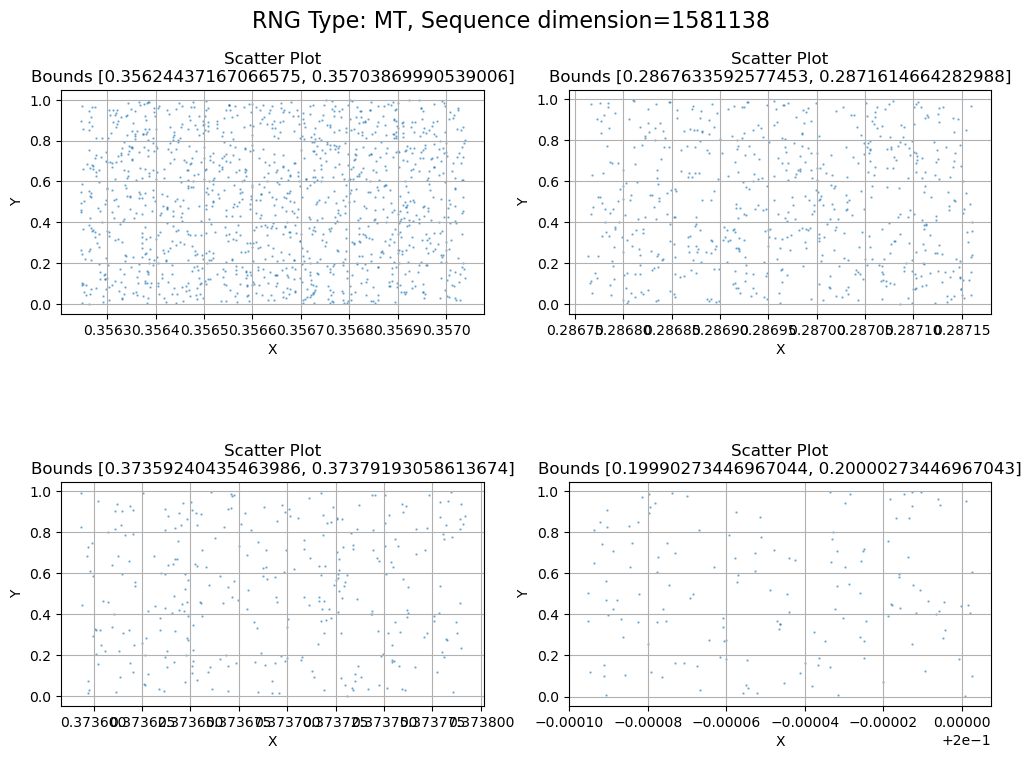

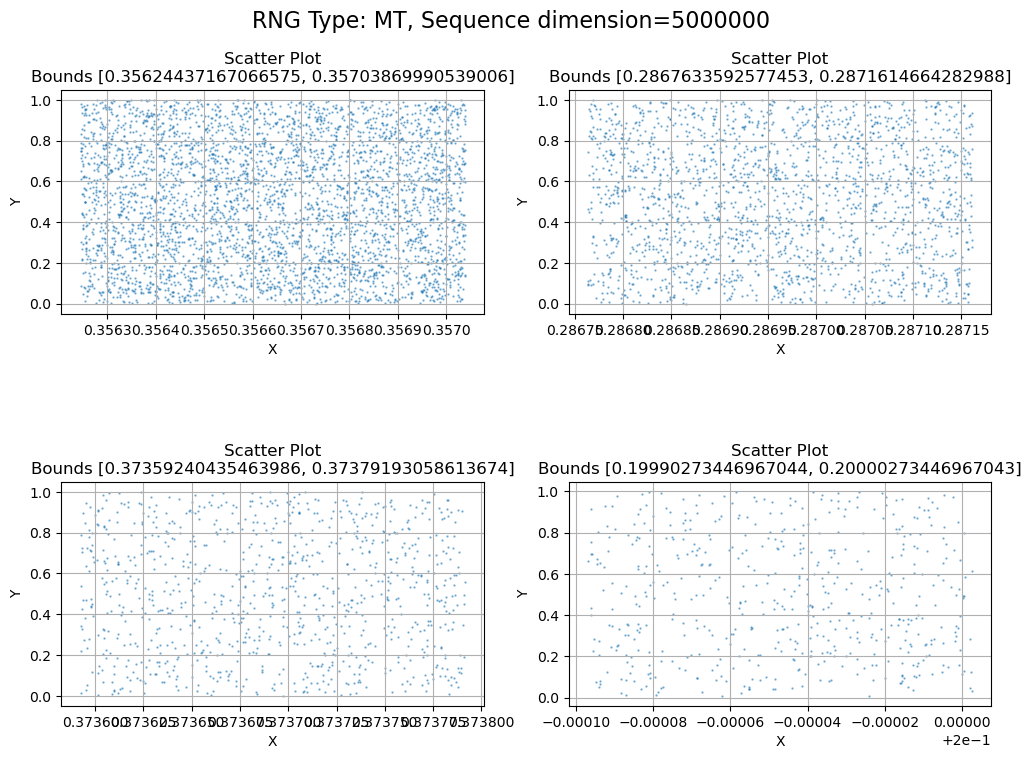

In [15]:
### GENERATE ALL PLOTS

print('---------GGL---------')
for j in range(num_dimensions):
    
    #GGL Generation
    _,sequence = GGL(steps=int(dimensions[j]), normalized=True)
    filtered_x=task4_plots(sequence, RNG_type="GGL", lower_bounds=lower_bounds, upper_bounds=upper_bounds)


print('---------RAN3---------')
for j in range(num_dimensions):

    #RNL Generation
    _, sequence = RAN3(steps=int(dimensions[j]), normalized=True)
    _=task4_plots(sequence, RNG_type="RAN3", lower_bounds=lower_bounds, upper_bounds=upper_bounds)



print('---------MT---------')
for j in range(num_dimensions):
    
    #MT Generation
    sequence=[random.random() for _ in range(int(dimensions[j]))]
    _=task4_plots(sequence, RNG_type="MT", lower_bounds=lower_bounds, upper_bounds=upper_bounds)
    

We can observe that in many plots generated by GGL, points tend to exhibit a consistent pattern, aligning along numerous diagonal lines(if you increase number of dimensions it would be more clear). This phenomenon becomes more pronounced as the point density increases. Porbably this phenomenon is due to GGL definition, since GGL suffers from correlation.
 
RAN3 and MT twister don't show recurrent patterns, cofirming absence of correlation.

---
---------

## Exercise 2

**(11 p total)**

### Tasks

<div class=" alert alert-info">
In a (ridiculously) simplistic model a person’s optimism/pessimism is characterised by a number that changes through interactions with others. A large number means strong optimism and a small number strong pessimism. You want to find out the probability density resulting from a large number of interactions. You take 500 000 agents
(persons) in the model and set the number describing their initial state at 50. Each of these
agents has 100 interactions in a) and b). In c) due to the nature of the resulting distribution take only 10 interactions for each agent. The interactions change an agent’s state according to the following models:
    
c)  

#### a. Independently of previous interactions, each new interaction shifts the agent’s state by equal probability towards pessimism by -1, or towards optimism by +1. 
    
#### b. Independently of previous transitions, each new interaction shifts the agent’s state by equal probability towards pessimism by -0.5, or towards optimism by +10.
    
#### c. The agent’s response is dependent on previous interactions such that the new state is determined by multiplying the present state by 0.7 if the interaction strengthens pessimism and by 1/0.7 if the


(i) obtain and display the PMF using linear binning (standard histogram).
(ii) Do logarithmic binning by using python command
plt.hist(state, bins=np.logspace(start=np.log10(1), stop=np.log10(2000), num=50),
density='true'). Try varying scaling of the axes. Display only the plot with the scaling from 
which you can identify the PMF. Can you roughly recognize the form of the PMF for the
appropriately chosen scaling? Name this PMF form and/or the corresponding asymptotic
pdf.
(iii) Name the stochastic process.
Note 1: You can use ready random generators of python. You get PMF’s by plotting
histograms (hist-command in matplotlib, with density=’true’).
Note 2: In some case(s) it may help to change an axis/axes to logarithmic in order to
determine the pdf.
Note 3: All PMFs and pdfs can be taken as unnormalized: no need to determine prefactors. 
</div>

### Overview

To obtain a precise estimation of the PMF, I will perform multiple simulations(but only in point 'a' and 'b'), thanks to a function that simulates an optional number of simulation of the models, and for each simulation evaluate corresponding PMF and then evaluate an average PMF. However, the number of simulations will be chosen to strike the right balance between computational cost and accuracy. Number of bins in case a) and b) has benne chosen after sperimentations as we'll see in point a)'s solution. 

Note that model 'a' is basically a multidimensional random walk. Additionally model 'a' and 'b' are Markovian.

### Constants for 'a' and 'b'

In the cell below we find constants that will be used during exercise's execution.

In [16]:
num_agents = 500000
initial_state = 50
num_interactions_a_b = 100

### Useful functions.

The functions below are used to solve the points separation problem and streamline the code. In fact the following functions allow us to simulate as we want.

In [17]:
#first function generates model a and b
def interactions_model_a_b(current_state, point='a', num_interactions=num_interactions_a_b):
    """
    Simulate interactions and update agent states based on the chosen model (a or b).

    Args:
        current_state (numpy.ndarray): The current state of agents (initial state).
        point (str, optional): Specifies the model to use ('a' or 'b'). Defaults to 'a'.
        num_interactions(int,optional):number of interactions.

    Returns:
        numpy.ndarray: Updated agent states after the interactions.
    """
    # Make a copy of the current state to avoid modifying the original
    state = current_state.copy()
    
    lower = -1  # Default lower shift for model 'a'
    upper = 1   # Default upper shift for model 'a'
    
    if point == 'b':  # If 'b' is specified, use different shift values
        lower = -0.5
        upper = 10

    # Create a random array of shifts for all agents and interactions
    random_shifts = np.random.choice([lower, upper], size=(num_interactions, len(state)))

    # Update agent states based on random shifts using vectorized addition
    state += random_shifts.sum(axis=0)
    
    return state

#this function make several simulations
def PMF_estimator_model_a_b(num_agents=num_agents, num_simulations=10, model='a', custom_bins=None, num_interactions=num_interactions_a_b):
    """
    This function aims to estimate the Probability Mass Function (PMF) for a given stochastic model.
    
    Args:
        - num_agents (int,optional): Number of agents.
        - num_simulations (int, optional): Number of simulations to perform.
        - model (str, optional): The stochastic model to simulate ('a' or 'b').
        - custom_bins (list or None, optional): Custom bins specified by the user. If None, default bins will be used.
        - num_interactions(int,optional): Number of interactions
    
    Returns:
        - pmf_media (numpy array): The averaged PMF obtained from the simulations.
        - bins (numpy array): Bins for the PMF histogram.
    """

    # Initialize a list to store the PMFs from each simulation
    pmf_simulations = []

    for _ in range(num_simulations):
        # Simulate interactions for all agents
        state = np.full(num_agents, initial_state, dtype=float)
        
        state = interactions_model_a_b(state, point=model, num_interactions=num_interactions)
        
        # Determine bins to use based on user input or default
        if custom_bins is None:
            bins = range(-500, 1001)  # Default bins
        else:
            bins = custom_bins
        
        # Calculate PMF using histograms with specified bins
        pmf, bins = np.histogram(state, bins=bins, density=True)
        pmf_simulations.append(pmf)

    # Calculate the average PMF from the simulations
    pmf_media = np.mean(pmf_simulations, axis=0)
    bins = bins[:-1]

    return pmf_media, bins

**Note:** if you want to know why I have chosen that bins see extra part.

---
### Point a

Initial state: [50. 50. 50. ... 50. 50. 50.]
After interactions: [44. 42. 60. ... 54. 70. 52.]


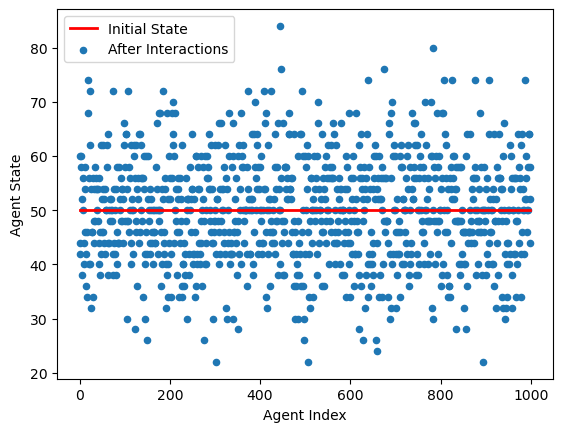

In [18]:
#Just a check on the function
states_a = np.full(num_agents, initial_state, dtype=float)

print('Initial state:',states_a)

new_states_a=interactions_model_a_b(states_a)

print('After interactions:', new_states_a)


# Plot for the comparison between the initial state and the state after interactions for the first 100 agents
plt.plot(np.arange(1000), states_a[:1000], label='Initial State', linewidth=2, color='red')  # just pick a sample
plt.scatter(np.arange(1000), new_states_a[:1000], label='After Interactions', s=20) 

plt.legend()

plt.xlabel("Agent Index")
plt.ylabel("Agent State")

plt.show()

#### PMF and PDF

In [19]:
# Now we run several simulations for the PMF

pmf_mean, bins_a=PMF_estimator_model_a_b(num_simulations=6, model='a')
#You can increase number of simulations but it may takes a lot of time

print(pmf_mean[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


As we can observe, the PMF contains relatively small values, which can be challenging to visualize accurately. To address this, we will create a plot.

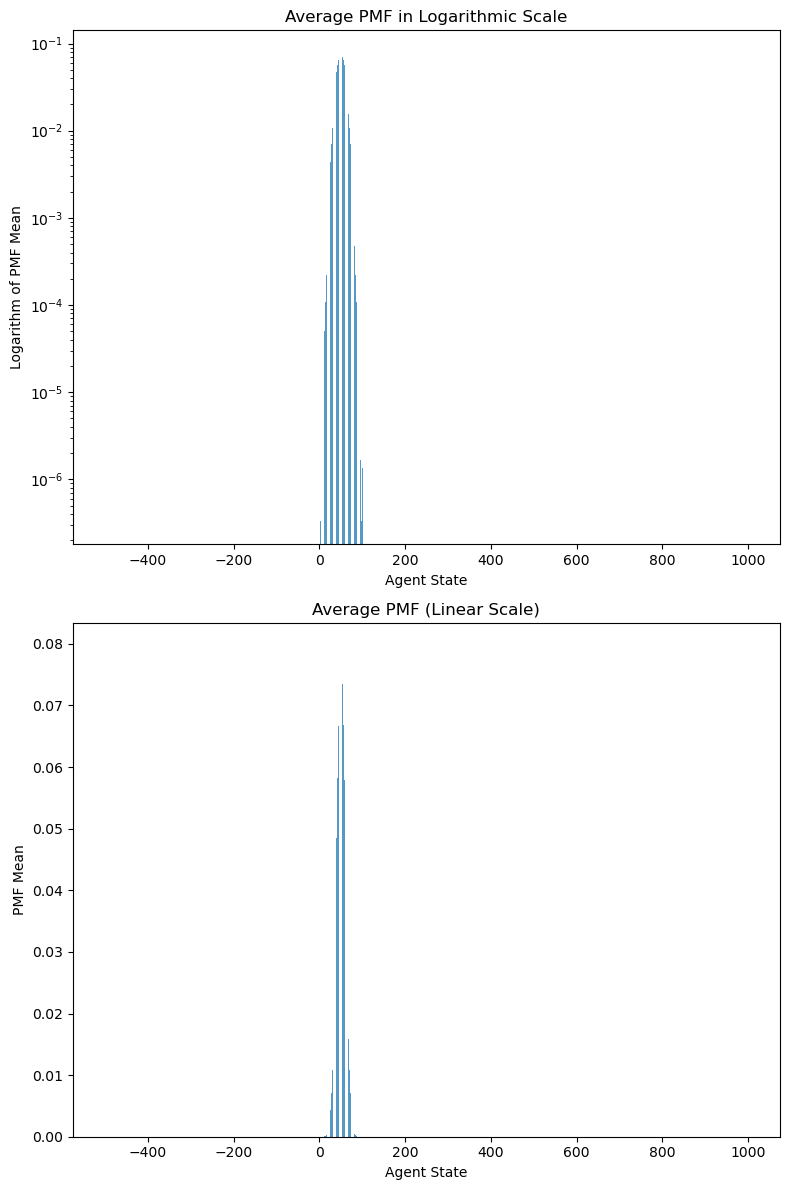

In [20]:
# Create a new figure with three sub-plots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(8, 12))


# Plot 1: Bar plot in logarithmic scale with custom bins
log_pmf_mean= np.log(pmf_mean + 1)
custom_bins = np.linspace(bins_a.min(), bins_a.max(), len(log_pmf_mean))
ax1.bar(custom_bins, log_pmf_mean, width=1, align='center', alpha=0.75)
ax1.set_title("Average PMF in Logarithmic Scale")
ax1.set_xlabel("Agent State")
ax1.set_ylabel("Logarithm of PMF Mean")
ax1.set_yscale('log')  # Set the y-axis to a logarithmic scale

# Define custom bins for the linear scale plot
custom_bins_linear = np.linspace(bins_a.min(), bins_a.max(), len(pmf_mean))

# Plot 3: Bar plot without logarithmic scale using custom_bins_linear
ax3.bar(custom_bins_linear, pmf_mean, width=1, align='center', alpha=0.75)
ax3.set_title("Average PMF (Linear Scale)")
ax3.set_xlabel("Agent State")
ax3.set_ylabel("PMF Mean")

# Adjust spacing between sub-plots
plt.tight_layout()

plt.show()

The distribution appears to be symmetric with a discrete peak, indicating that it follows a **binomial distribution**.

Now we look for the PDF by incresing both number of interactions and number of agents.

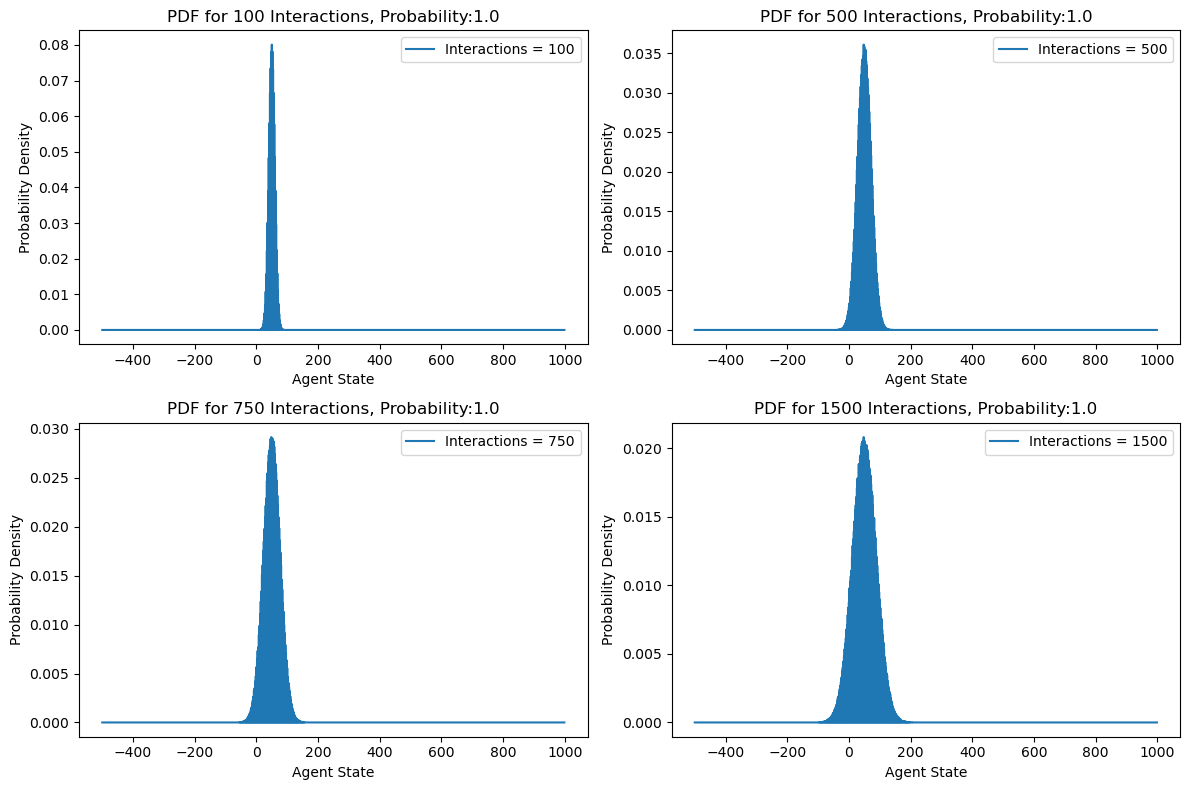

In [21]:
# Define a list of different numbers of interactions
interactions = [100,500,750,1500] #You can change values of interactions but don't ask too much

# Initialize a list to store the resulting PDFs
pdfs = []

#Initialize current state
current_state=np.full(num_agents, initial_state, dtype=float)

# Iterate over different numbers of interactions
for num_interactions in interactions:
    # Simulate interactions for the current number of interactions
    new_state_a = interactions_model_a_b(current_state, point='a', num_interactions=num_interactions)

    # Calculate the PMF using histograms with specified bins
    pmf_mean, bins_a = np.histogram(new_state_a, bins=range(-500, 1001), density=True)

    # Calculate the PDF from the PMF (approximation)
    pdf = pmf_mean / np.sum(pmf_mean)

    # Append the PDF to the list
    pdfs.append(pdf)
# Create subplots for each PDF
plt.figure(figsize=(12, 8))
for i, pdf in enumerate(pdfs):
    plt.subplot(2, 2, i + 1)
    plt.plot(bins_a[:-1], pdf, label=f'Interactions = {interactions[i]}')
    plt.title(f'PDF for {interactions[i]} Interactions, Probability:{np.sum(pdf)}')
    plt.xlabel("Agent State")
    plt.ylabel("Probability Density")
    plt.legend()

plt.tight_layout()
plt.show()

So, we observe a curve that is becoming broader. This is because we are increasing the number of interactions, leading to final states with greater variability. However, it appears that the differences in width are becoming less discernible as we approach the PDF. Nevertheless, we are constrained by the computing power of the PC, so simulating larger values is not feasible. 

By now, the distribution seems to be Gaussian, however, let's make another check by increasing nubero of agents.

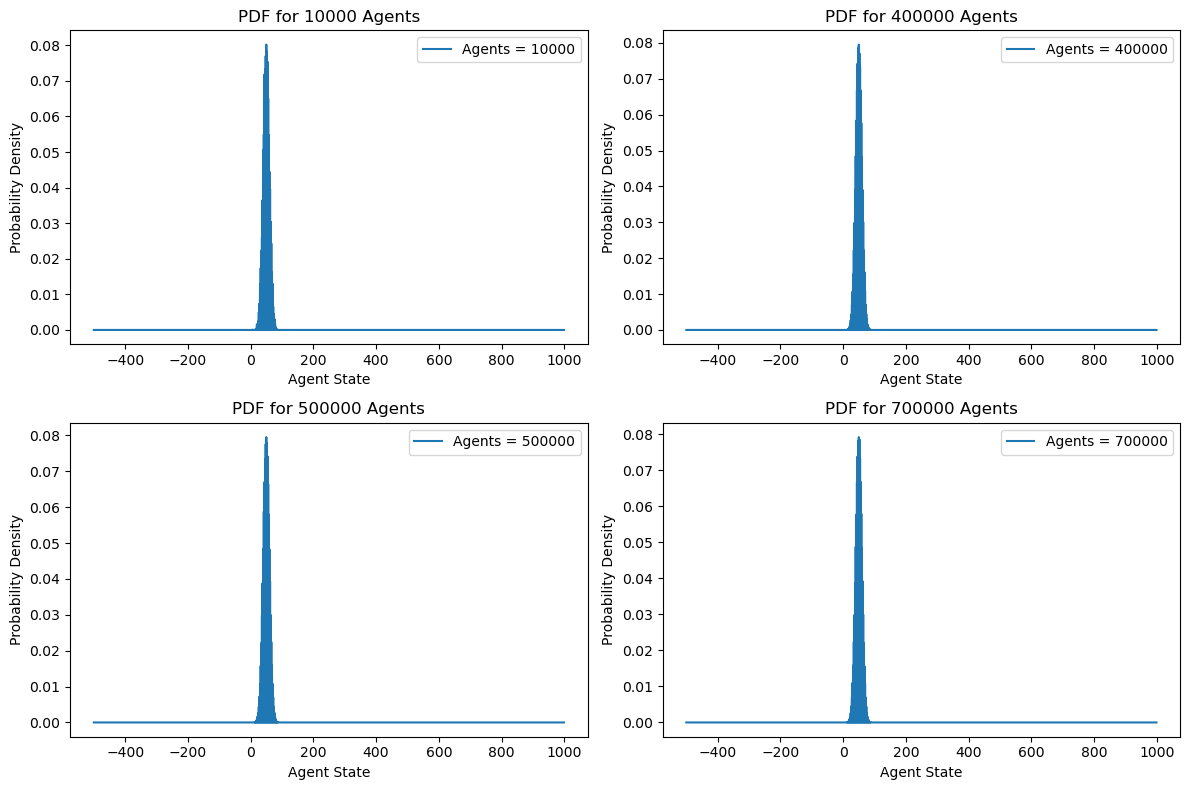

In [22]:
# Define a list of different agent dimensions
agent_dimensions = [10000,400000,500000,700000]

# Initialize a list to store the resulting PDFs
pdfs = []

# Iterate over different agent dimensions
for num_agents1 in agent_dimensions:
    
    # Create initial states for the specified number of agents
    current_state = np.full(num_agents1, initial_state, dtype=float)
    
    # Simulate interactions for the fixed number of interactions
    new_state_a = interactions_model_a_b(current_state, point='a', num_interactions=num_interactions_a_b)
    
    # Calculate the PMF using histograms with specified bins
    pmf_mean, bins_a = np.histogram(new_state_a, bins=range(-500, 1001), density=True)
    
    # Calculate the PDF from the PMF (approximation)
    pdf = pmf_mean / np.sum(pmf_mean)
    
    # Append the PDF to the list
    pdfs.append(pdf)

# Create subplots for each PDF
plt.figure(figsize=(12, 8))
for i, pdf in enumerate(pdfs):
    plt.subplot(2, 2, i + 1)
    plt.plot(bins_a[:-1], pdf, label=f'Agents = {agent_dimensions[i]}')
    plt.title(f'PDF for {agent_dimensions[i]} Agents')
    plt.xlabel("Agent State")
    plt.ylabel("Probability Density")
    plt.legend()

plt.tight_layout()
plt.show()


We don't observe significant differences when increasing the number of agents. 

However, the curve exhibits a bell-shaped pattern, and considering the Central Limit Theorem(binomial converges to a gaussian), the distribution appears to approach a **Gaussian** distribution.

 ---
### Point b

The analysis in this section closely mirrors the previous one. To prevent redundancy, I will go faster.

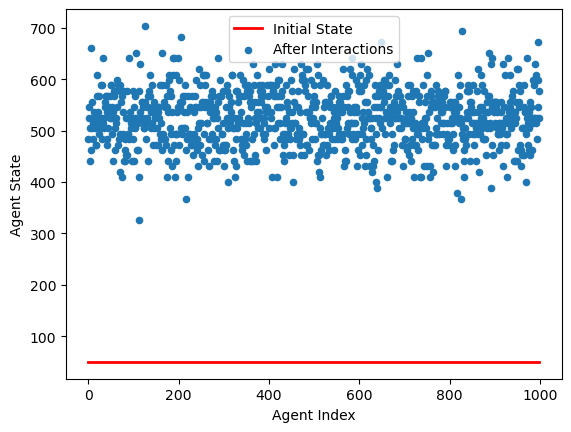

In [23]:
#Quick a check on the function


states_b = np.full(num_agents, initial_state, dtype=float)

new_states_b=interactions_model_a_b(states_b,point='b')

# Plot for the comparison between the initial state and the state after interactions for the first 100 agents
plt.plot(np.arange(1000), states_b[:1000], label='Initial State', linewidth=2, color='red')  # just pick a sample
plt.scatter(np.arange(1000), new_states_b[:1000], label='After Interactions', s=20) 
plt.legend()
plt.xlabel("Agent Index")
plt.ylabel("Agent State")
plt.show()

#### PMF and PDF

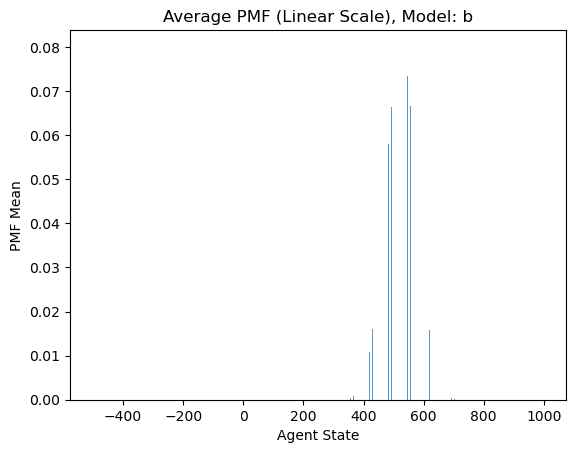

In [24]:
# Now we run several simulations for the PMF, and we plot
pmf_mean_b, bins_b = PMF_estimator_model_a_b(num_simulations=5, model='b')

custom_bins = np.linspace(bins_b.min(), bins_b.max(), len(pmf_mean_b))

# Plot 2: Bar plot without logarithmic scale
plt.bar(custom_bins, pmf_mean_b, width=1, align='center', alpha=0.75)
plt.title("Average PMF (Linear Scale), Model: b")
plt.xlabel("Agent State")
plt.ylabel("PMF Mean")

plt.show()

The distribution seems to be symmetric. It has discrete peak so it is a **binomial distribution**, too. Now we try with pdf.

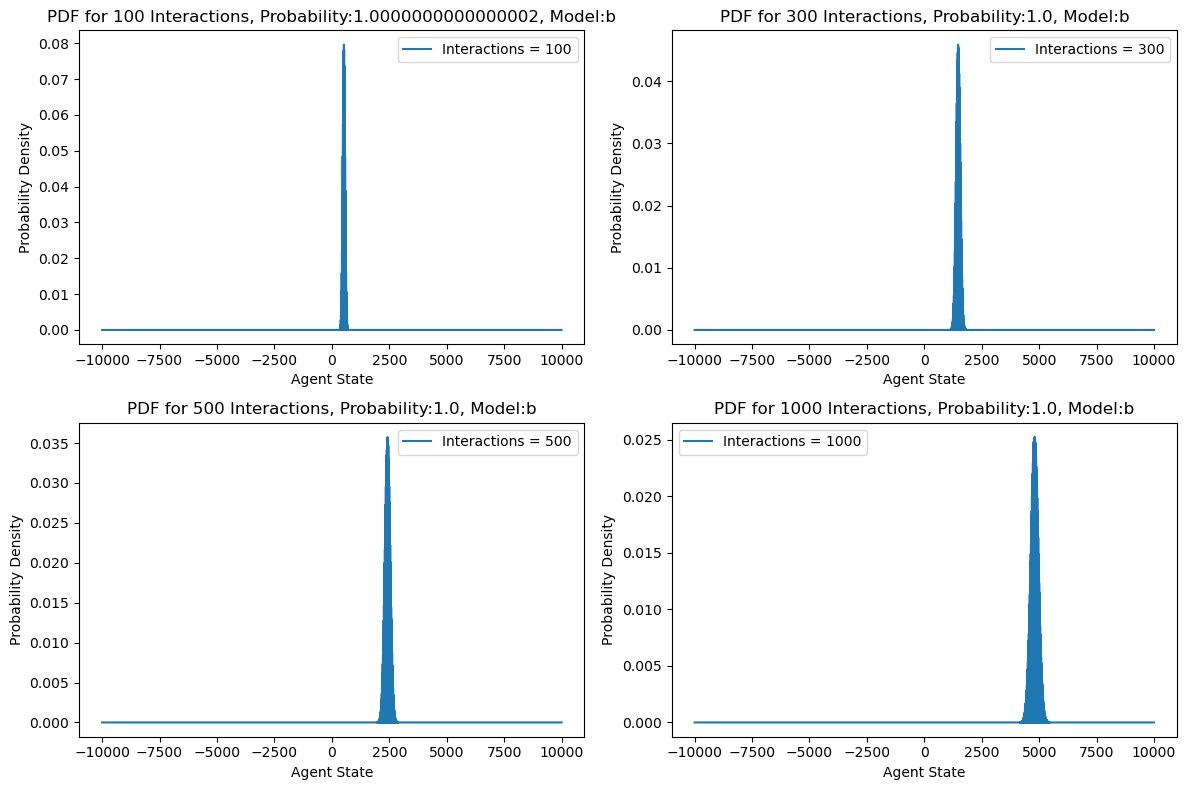

In [25]:
# Basically same experiments, but just change bins in np.histogtram
interactions = [100, 300,500,1000] #You can change values of interactions but don't ask too much

# Initialize a list to store the resulting PDFs
pdfs = []

#Initialize current state
current_state=np.full(num_agents, initial_state, dtype=float)

# Iterate over different numbers of interactions
for num_interactions in interactions:
    # Simulate interactions for the current number of interactions
    new_state_a = interactions_model_a_b(current_state, point='b', num_interactions=num_interactions)
    
    #print(new_state_a[:20])
    pmf_mean, bins_a = np.histogram(new_state_a, bins=range(-10000,10000), density=True)
    
    # Calculate the PDF from the PMF (approximation)
    pdf = pmf_mean / np.sum(pmf_mean)
    
    #print(np.sum(pmf_mean))

    # Append the PDF to the list
    pdfs.append(pdf)
# Create subplots for each PDF
plt.figure(figsize=(12, 8))
for i, pdf in enumerate(pdfs):
    plt.subplot(2, 2, i + 1)
    plt.plot(bins_a[:-1], pdf, label=f'Interactions = {interactions[i]}')
    plt.title(f'PDF for {interactions[i]} Interactions, Probability:{np.sum(pdf)}, Model:b')
    plt.xlabel("Agent State")
    plt.ylabel("Probability Density")
    plt.legend()

plt.tight_layout()
plt.show()

We observe that the curve is moving towards infinity. The result shouldn't be surprising when considering the structure of the model.

While in model 'a', agents had an equal probability of transitioning up or down (+1 or -1), which means the average change was zero, and therefore the curve essentially didn't move (but it clearly widened due to increased variability in the multidimensional random walk), in model 'b', we have an average increase of 9.5. This leads to a substantial increase in agent states when the dimensionality of the system increases.

So we can state that also this PDF follows a **gaussian distribution**.

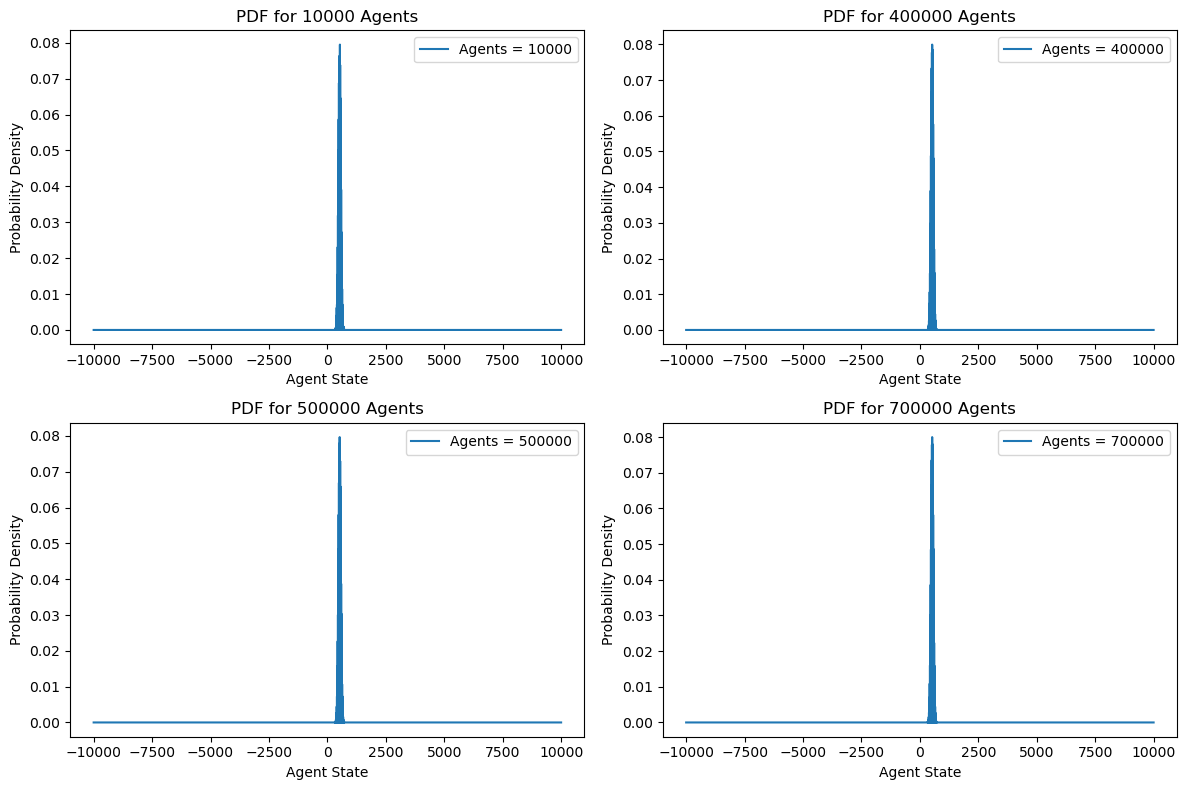

In [26]:
# Define a list of different agent dimensions
agent_dimensions = [10000,400000,500000,700000]

# Initialize a list to store the resulting PDFs
pdfs = []

# Iterate over different agent dimensions
for num_agents1 in agent_dimensions:
    
    # Create initial states for the specified number of agents
    current_state = np.full(num_agents1, initial_state, dtype=float)
    
    # Simulate interactions for the fixed number of interactions
    new_state_a = interactions_model_a_b(current_state, point='b', num_interactions=num_interactions_a_b)
    
    # Calculate the PMF using histograms with specified bins
    pmf_mean, bins_a = np.histogram(new_state_a, bins=range(-10000,10000), density=True)
    
    # Calculate the PDF from the PMF (approximation)
    pdf = pmf_mean / np.sum(pmf_mean)
    
    # Append the PDF to the list
    pdfs.append(pdf)

# Create subplots for each PDF
plt.figure(figsize=(12, 8))
for i, pdf in enumerate(pdfs):
    plt.subplot(2, 2, i + 1)
    plt.plot(bins_a[:-1], pdf, label=f'Agents = {agent_dimensions[i]}')
    plt.title(f'PDF for {agent_dimensions[i]} Agents')
    plt.xlabel("Agent State")
    plt.ylabel("Probability Density")
    plt.legend()

plt.tight_layout()
plt.show()

Even in this case we don't see many differences by increasing number of agents.

 ---
### Point c

For computational cost reasons (the 'c' model is heavier to simulate), in this section, I will not conduct an analysis of the bins. Similarly, for the same reasons, I will not perform an average evaluation of the pmf based on multiple simulations.

**Note:** below you'll find constants and functions used

In [27]:
#costant
num_agents_c = 500000
initial_state_c = 50
num_interactions_c = 10

In [28]:
def interactions_model_c(num_agents=num_agents_c, initial_state=initial_state_c, num_interactions=num_interactions_c):
    """
    Simulate the behavior of agents in Point C of the problem.

    Args:
        num_agents (int, optional): Number of agents (persons) in the model.
        initial_state (float, optional): The initial number characterizing the agents' optimism/pessimism.

    Returns:
        numpy.ndarray: An array containing the final state of each agent after interactions.
        numpy.ndarray: An array containing random strengths for each interaction.
    """
    # Create an array of random interactions for all agents and interactions
    random_strengths = np.random.choice([0.7, 1/0.7], size=(num_agents, num_interactions))
    
    # Compute the final states of all agents using element-wise multiplication
    final_states = initial_state * np.prod(random_strengths, axis=1)#note that initially we have only costant values

    return final_states, random_strengths

Now that I've defined all constants and functions, we can proceed to the solution.

In [29]:
###Just a check on function:

new_states_c,_= interactions_model_c()

print(new_states_c[:10],new_states_c.shape )

[ 50.         208.24656393 208.24656393  24.5        102.04081633
  24.5        102.04081633  50.          50.          12.005     ] (500000,)


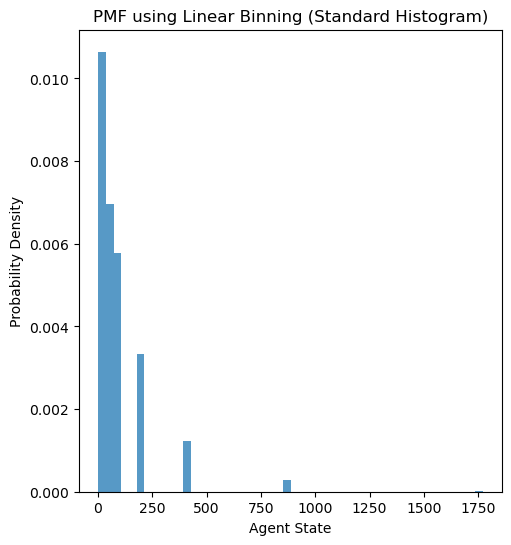

In [30]:
# Create a histogram with linear binning
pmf_c, bins_c = np.histogram(new_states_c, bins=50, density=True)

# Display the PMF using linear binning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bins_c[:-1], pmf_c, width=np.diff(bins_c), align='edge', alpha=0.75)
plt.title("PMF using Linear Binning (Standard Histogram)")
plt.xlabel("Agent State")
plt.ylabel("Probability Density")

plt.show()

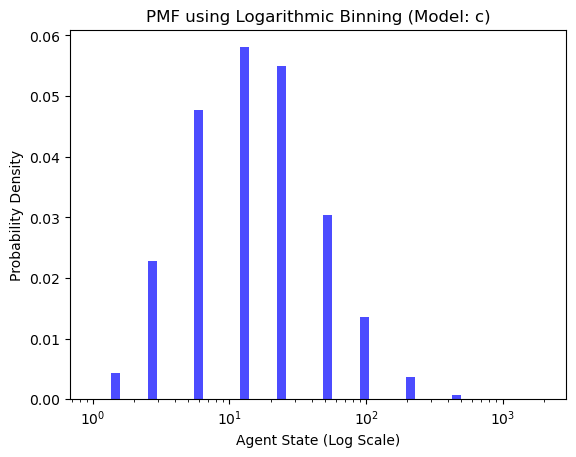

In [31]:
# Create a histogram with logarithmic binning
plt.hist(new_states_c, bins=np.logspace(start=np.log10(1), stop=np.log10(2000), num=50),
         density=True, alpha=0.7, color='blue')
plt.title("PMF using Logarithmic Binning (Model: c)")
plt.xlabel("Agent State (Log Scale)")
plt.ylabel("Probability Density")

plt.xscale('log')

plt.show()

The shape resembles that of a **lognormal distribution**. In order to be sure, we make a check on pdf.

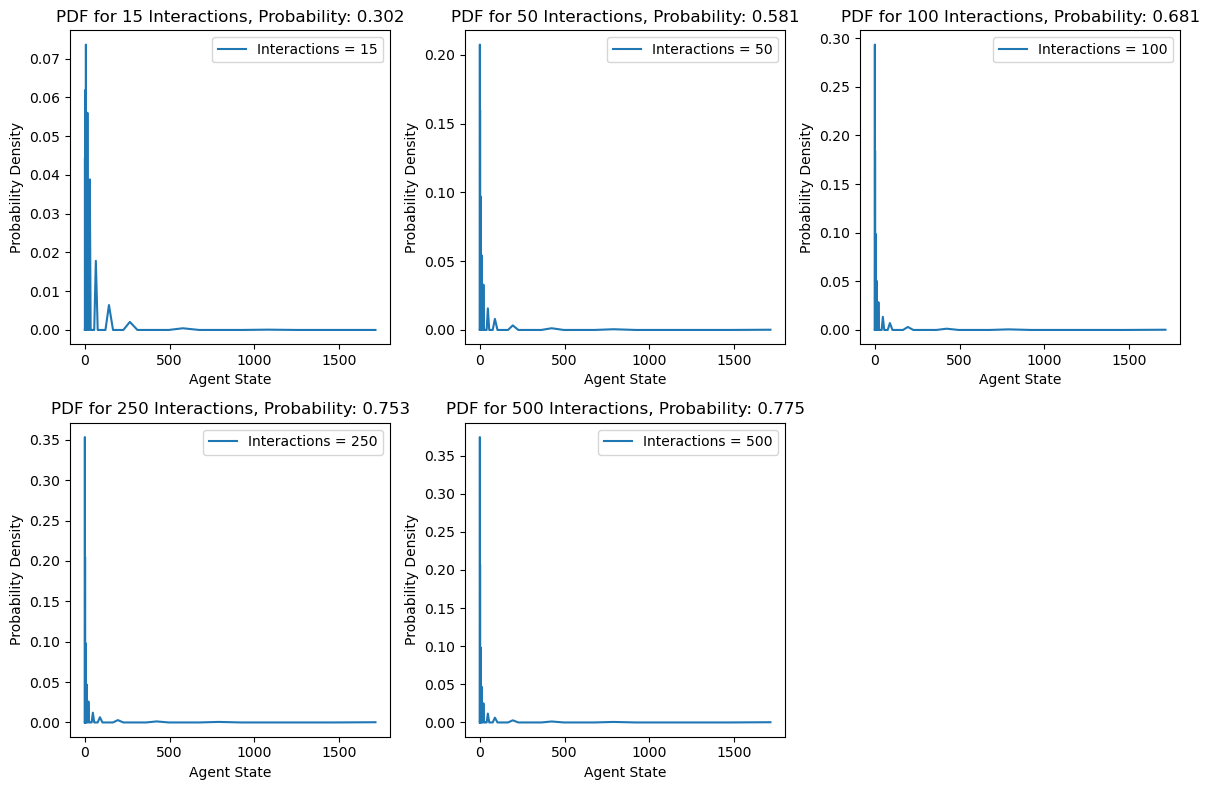

In [32]:
# Define a list of different numbers of interactions
interactions_c = [15, 50, 100, 250, 500]  # You can adjust the number of interactions

# Initialize a list to store the resulting PDFs for model c
pdfs_c = []

# Simulate interactions for each number of interactions and accumulate the results
for num_interactions in interactions_c:
    
    # Simulate interactions for the current number of interactions for model c
    new_states_c,_ = interactions_model_c(num_interactions=num_interactions)

    # Calculate the PDF using histograms with specified bins
    pdf_c, bins_c = np.histogram(new_states_c, bins=np.logspace(start=np.log10(1), stop=np.log10(2000), num=50), density=True)

    # Append the PDF to the list
    pdfs_c.append(pdf_c)

# Create subplots for each PDF for model C
plt.figure(figsize=(12, 8))
for i, pdf_c in enumerate(pdfs_c):
    plt.subplot(2, 3, i + 1)
    plt.plot(bins_c[:-1], pdf_c, label=f'Interactions = {interactions_c[i]}')
    plt.title(f'PDF for {interactions_c[i]} Interactions, Probability: {np.sum(pdf_c):.3f}')
    plt.xlabel("Agent State")
    plt.ylabel("Probability Density")
    plt.legend()

plt.tight_layout()
plt.show()

The above figures exhibit a pattern resembling that of a lognormal distribution. Therefore, based on the experiments, we can assert the log-normality of the distribution with reasonable confidence.

In fact, log-normal process realized product of many independent random variables(as in model 'c').

This is a stochastic process that leads to a log-normal distribution, so it can be called a log-normal process.

----
----
----
## Extra

----
###  Exercise 2.a

In the following part You will see how I have chosen the bins

In [33]:
# Define different bin edges for binning
bin_edges = [
    (0, 1),
    (-100, 101),
    (-250, 251),
    (-500, 501),
    (-100, 1001)  # Adjusted upper bound for the last case
]

sample_dimension = 10  # I cannot obviously print all PMFs

# Iterate through different bin configurations
for lower, upper in bin_edges:
    # Create bins based on the current bin edges
    bins = np.arange(lower, upper + 1)  # +1 to include upper bound

    # Calculate PMF using the current bin configuration
    pmf_a, bins_a = np.histogram(new_states_a, bins=bins, density=True)

    # Print or analyze pmf_a for this bin configuration
    print(f'Case: [{lower},{upper}]:', pmf_a[:sample_dimension], 'Row Sum(should be one):', np.sum(pmf_a))
    
print(bins_a)

Case: [0,1]: [nan] Row Sum(should be one): nan
Case: [-100,101]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Row Sum(should be one): 1.0
Case: [-250,251]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Row Sum(should be one): 1.0
Case: [-500,501]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Row Sum(should be one): 1.0
Case: [-100,1001]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Row Sum(should be one): 0.9999999999999999
[-100  -99  -98 ...  999 1000 1001]


/Users/lorenzobozzi/anaconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In our analysis, we observe that the most significant differences occur in the first interval, where the PMF is undefined. In all other cases, the sum of the rows equals 1, confirming that it is indeed a probability distribution. It appears that all other cases are similar.

However, as you can see in the 'PMF_estimator_model_a_b' plot, I have adjusted the bin range to be `bins=range(-500, 1001)` to achieve better visualization.

----
###  Exercise 2.b

In the following part You will see how I have chosen the bins

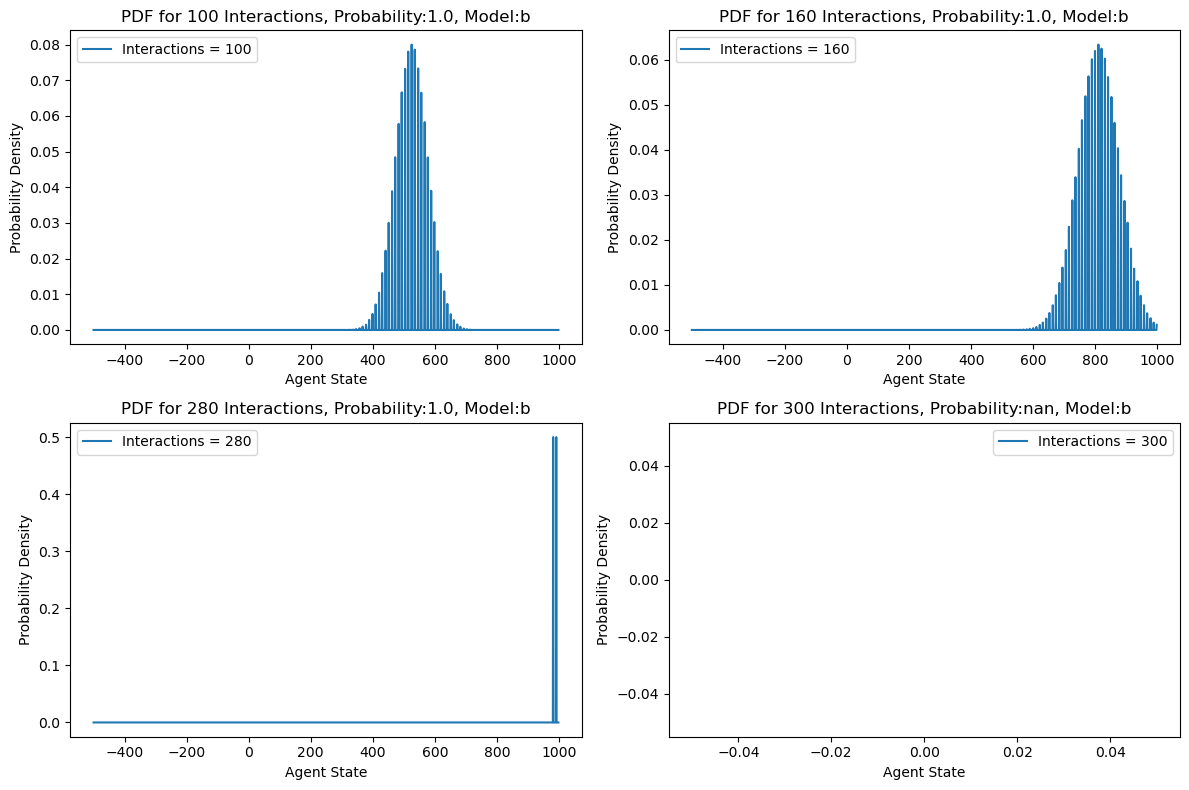

In [34]:
# Define a list of different numbers of interactions
interactions = [100,160,280,300] #You can change values of interactions but don't ask too much

# Initialize a list to store the resulting PDFs
pdfs = []

#Initialize current state
current_state=np.full(num_agents, initial_state, dtype=float)

# Iterate over different numbers of interactions
for num_interactions in interactions:
    # Simulate interactions for the current number of interactions
    new_state_a = interactions_model_a_b(current_state, point='b', num_interactions=num_interactions)
    
    #print(new_state_a[:20])
    pmf_mean, bins_a = np.histogram(new_state_a, bins=range(-500,1000), density=True)
    
    # Calculate the PDF from the PMF (approximation)
    pdf = pmf_mean / np.sum(pmf_mean)
    
    #print(np.sum(pmf_mean))

    # Append the PDF to the list
    pdfs.append(pdf)
# Create subplots for each PDF
plt.figure(figsize=(12, 8))
for i, pdf in enumerate(pdfs):
    plt.subplot(2, 2, i + 1)
    plt.plot(bins_a[:-1], pdf, label=f'Interactions = {interactions[i]}')
    plt.title(f'PDF for {interactions[i]} Interactions, Probability:{np.sum(pdf)}, Model:b')
    plt.xlabel("Agent State")
    plt.ylabel("Probability Density")
    plt.legend()

plt.tight_layout()
plt.show()

We observe that the peak of the curve is essentially shifting to the right. However, there is a noticeable issue when 'interactions > 300': we find that the sum of the PDF becomes NaN (Not a Number). This could be attributed to a division by zero, but this possibility is prevented (simply uncomment the print(pmf) command). In reality, this is due to the choice of bin intervals, as demonstrated in the experiment of the main part. Increasing the bin range helps us avoid this phenomenon. To further illustrate the point, this highlights the critical importance of a thorough bin analysis.

In the main solition we were able to visualize cases with more iterations as well since I've changed the number of bins used in point 'a'. If you want to try running the experiment with an increased number of iterations, remember to also increase the range of bins.